In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import SGDClassifier,RidgeClassifier
from sklearn.model_selection import cross_val_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [100]:
df_frz=pd.read_csv('/content/drive/MyDrive/24Jan_DL/ToN-IoT/Train_Test_datasets/Train_Test_IoT_dataset/Train_Test_IoT_Fridge.csv')
df_gps=pd.read_csv('/content/drive/MyDrive/24Jan_DL/ToN-IoT/Train_Test_datasets/Train_Test_IoT_dataset/Train_Test_IoT_GPS_Tracker.csv')
df_GD=pd.read_csv('/content/drive/MyDrive/24Jan_DL/ToN-IoT/Train_Test_datasets/Train_Test_IoT_dataset/Train_Test_IoT_Garage_Door.csv')

# Fridge IoT

In [4]:
df_frz['date']=pd.to_datetime(df_frz['date'])
df_frz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59944 entries, 0 to 59943
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ts                  59944 non-null  int64         
 1   date                59944 non-null  datetime64[ns]
 2   time                59944 non-null  object        
 3   fridge_temperature  59944 non-null  float64       
 4   temp_condition      59944 non-null  object        
 5   label               59944 non-null  int64         
 6   type                59944 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 3.2+ MB


In [5]:
Time=df_frz.time.str.split(':')

In [6]:
hh=[int(i[0]) for i in Time]
mm=[int(i[1]) for i in Time]
ss=[int(i[2]) for i in Time]
df_frz['hh']=hh
df_frz['mm']=mm
df_frz['ss']=ss

In [7]:
df_frz['Month']=df_frz.date.dt.month
df_frz['Day']=df_frz.date.dt.day

In [8]:
temp=df_frz['type']
df_frz.drop(['type','time','date'],axis=1,inplace=True)
df_frz['type']=temp

In [9]:
df_frz.temp_condition.replace(['high ','high','high  '],1,inplace=True)
df_frz.temp_condition.replace(['low','low ','low  '],0,inplace=True)

In [10]:
df_frz

,ts,fridge_temperature,temp_condition,label,hh,mm,ss,Month,Day,type
0,1556245180,9.00,1,1,19,19,40,4,25,ddos
1,1556245180,9.25,1,1,19,19,40,4,25,ddos
2,1556245185,12.65,1,1,19,19,45,4,25,ddos
3,1556245185,4.65,0,1,19,19,45,4,25,ddos
4,1556245195,12.65,1,1,19,19,55,4,25,ddos
...,...,...,...,...,...,...,...,...,...,...
59939,1554203235,7.65,1,0,4,7,15,4,2,normal
59940,1554203235,13.85,1,0,4,7,15,4,2,normal
59941,1554203235,5.40,0,0,4,7,15,4,2,normal
59942,1554203235,2.90,0,0,4,7,15,4,2,normal


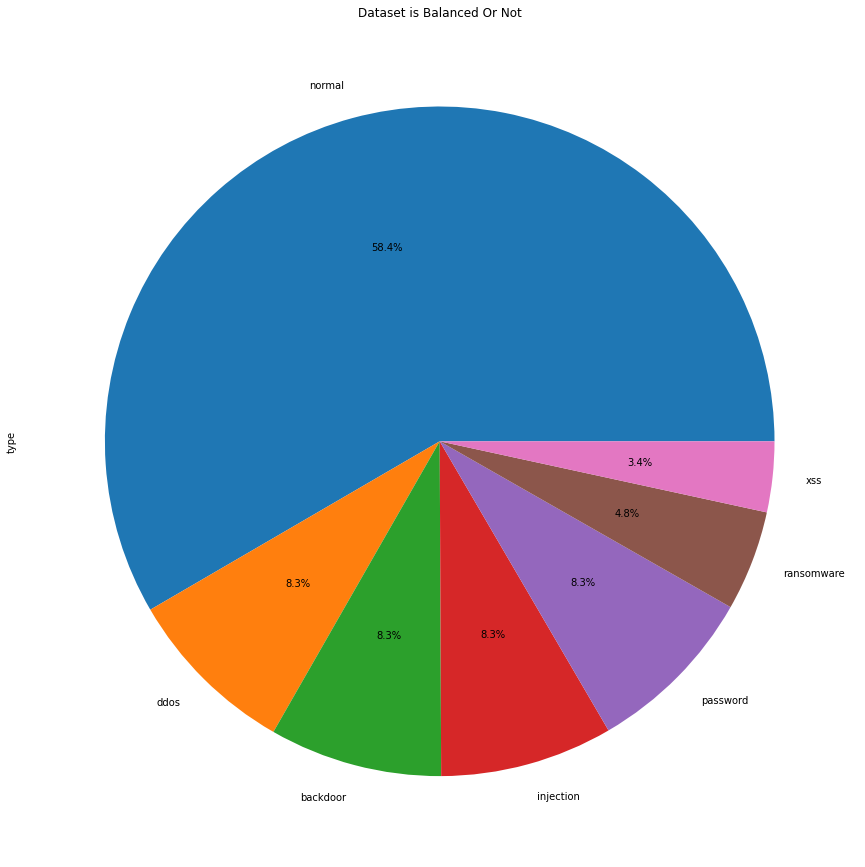

In [11]:
df_frz['type'].value_counts().plot.pie(figsize=(15,16),autopct='%1.1f%%',title='Dataset is Balanced Or Not')

In [12]:
Normal=df_frz.drop(df_frz[df_frz.label==1].index)
Attack=df_frz.drop(df_frz[df_frz.label==0].index)

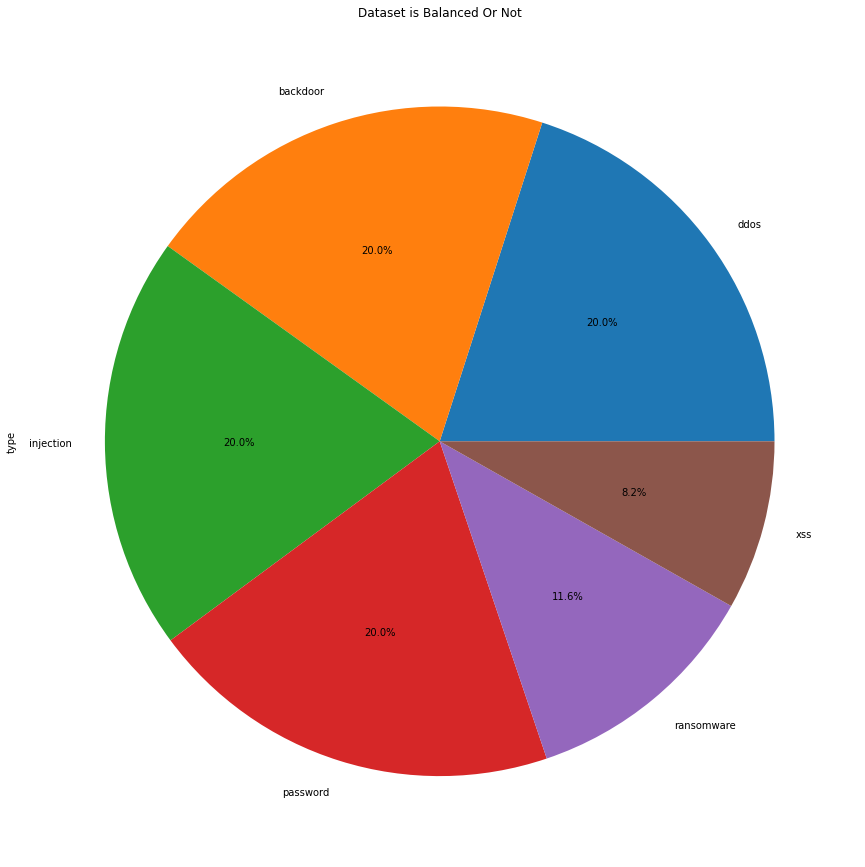

In [13]:
Attack['type'].value_counts().plot.pie(figsize=(15,16),autopct='%1.1f%%',title='Dataset is Balanced Or Not')

In [14]:
Attack

,ts,fridge_temperature,temp_condition,label,hh,mm,ss,Month,Day,type
0,1556245180,9.00,1,1,19,19,40,4,25,ddos
1,1556245180,9.25,1,1,19,19,40,4,25,ddos
2,1556245185,12.65,1,1,19,19,45,4,25,ddos
3,1556245185,4.65,0,1,19,19,45,4,25,ddos
4,1556245195,12.65,1,1,19,19,55,4,25,ddos
...,...,...,...,...,...,...,...,...,...,...
39453,1556367215,13.25,1,1,5,13,35,4,27,xss
39454,1556367216,4.35,0,1,5,13,36,4,27,xss
39455,1556367216,1.00,0,1,5,13,36,4,27,xss
39456,1556367216,10.25,1,1,5,13,36,4,27,xss


In [15]:
list(Attack.temp_condition.value_counts().index)

[1, 0]

In [16]:
Attack.temp_condition.replace(['high'],1,inplace=True)
Attack.temp_condition.replace(['low'],0,inplace=True)

In [17]:
Attack['type']=LabelEncoder().fit_transform(Attack['type'])

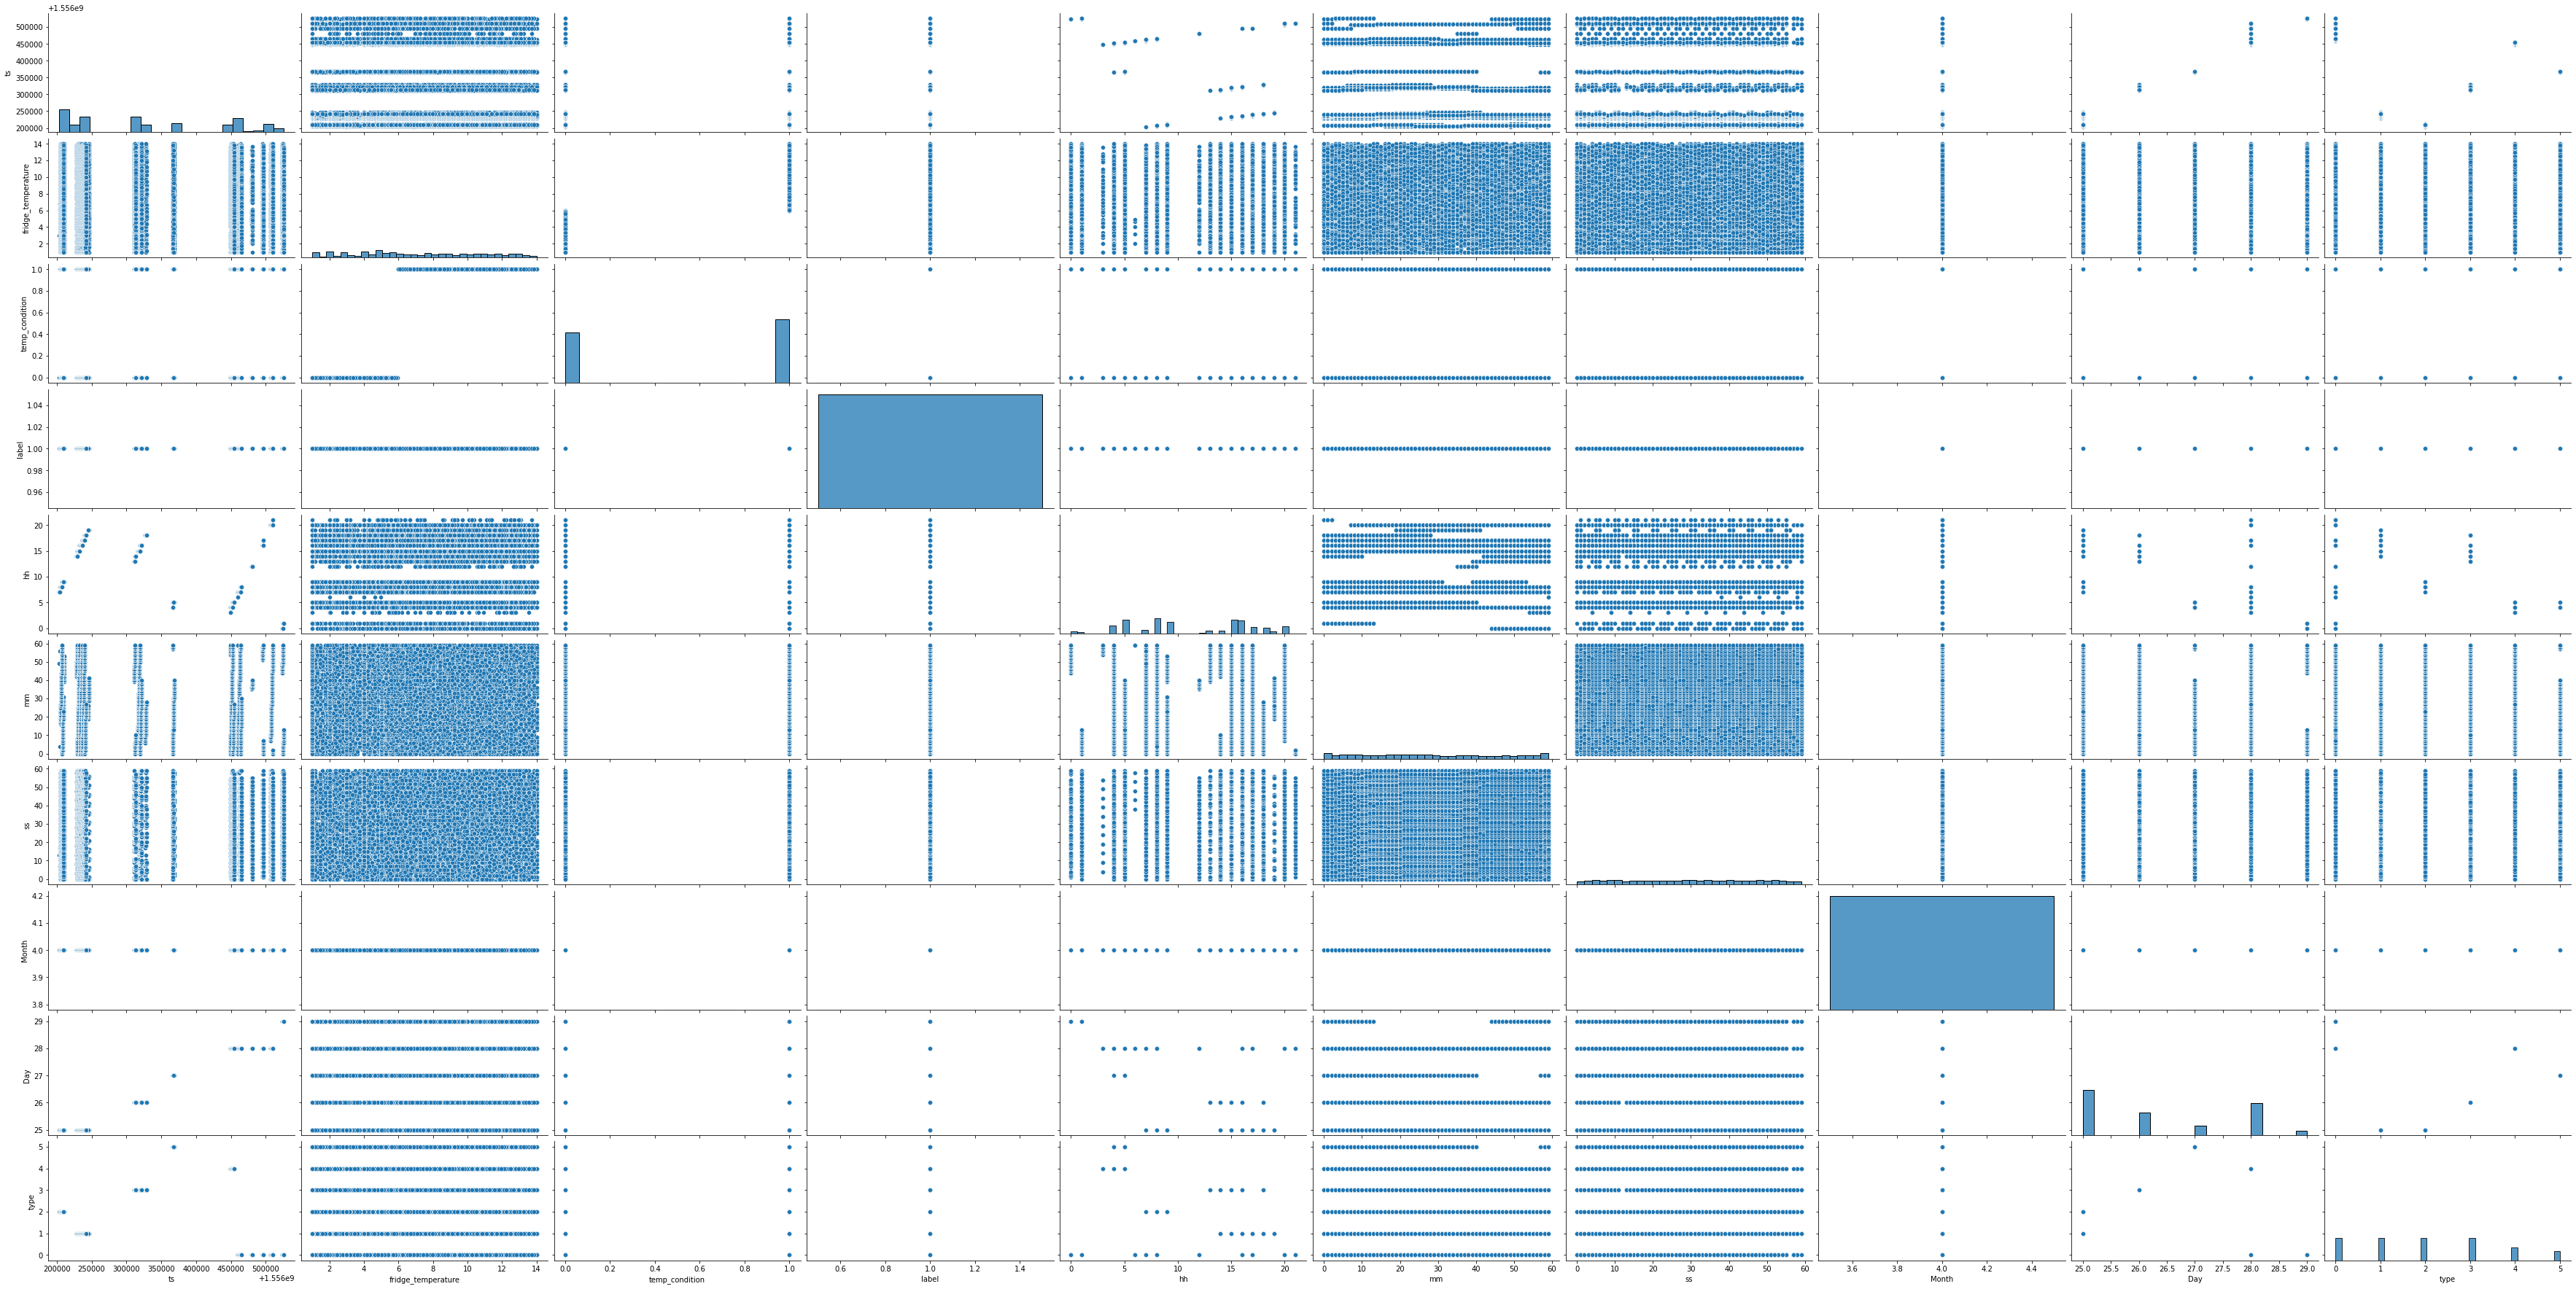

In [18]:
sns.pairplot(Attack,height=2.5,aspect=2)

In [19]:
Attack.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24944 entries, 0 to 39457
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ts                  24944 non-null  int64  
 1   fridge_temperature  24944 non-null  float64
 2   temp_condition      24944 non-null  int64  
 3   label               24944 non-null  int64  
 4   hh                  24944 non-null  int64  
 5   mm                  24944 non-null  int64  
 6   ss                  24944 non-null  int64  
 7   Month               24944 non-null  int64  
 8   Day                 24944 non-null  int64  
 9   type                24944 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 2.6 MB


In [20]:
All1=df_frz.drop(['temp_condition','label','Month'],axis=True)
All1['type']=LabelEncoder().fit_transform(All1['type'])

In [21]:
X=All1.iloc[:,:-1]
y=All1.iloc[:,-1]

In [22]:
X=Attack.iloc[:,:-1]
y=Attack.iloc[:,-1]

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [24]:
X_train.corr()

,ts,fridge_temperature,temp_condition,label,hh,mm,ss,Month,Day
ts,1.000000,-0.003922,-0.009244,NaN,-0.222849,-0.040833,-0.019178,NaN,0.985716
fridge_temperature,-0.003922,1.000000,0.838443,NaN,0.017525,0.000452,0.002968,NaN,-0.006745
temp_condition,-0.009244,0.838443,1.000000,NaN,0.009157,-0.004412,-0.000263,NaN,-0.010296
label,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hh,-0.222849,0.017525,0.009157,NaN,1.000000,-0.014814,0.029174,NaN,-0.383618
mm,-0.040833,0.000452,-0.004412,NaN,-0.014814,1.000000,-0.003148,NaN,-0.044989
ss,-0.019178,0.002968,-0.000263,NaN,0.029174,-0.003148,1.000000,NaN,-0.023315
Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day,0.985716,-0.006745,-0.010296,NaN,-0.383618,-0.044989,-0.023315,NaN,1.000000


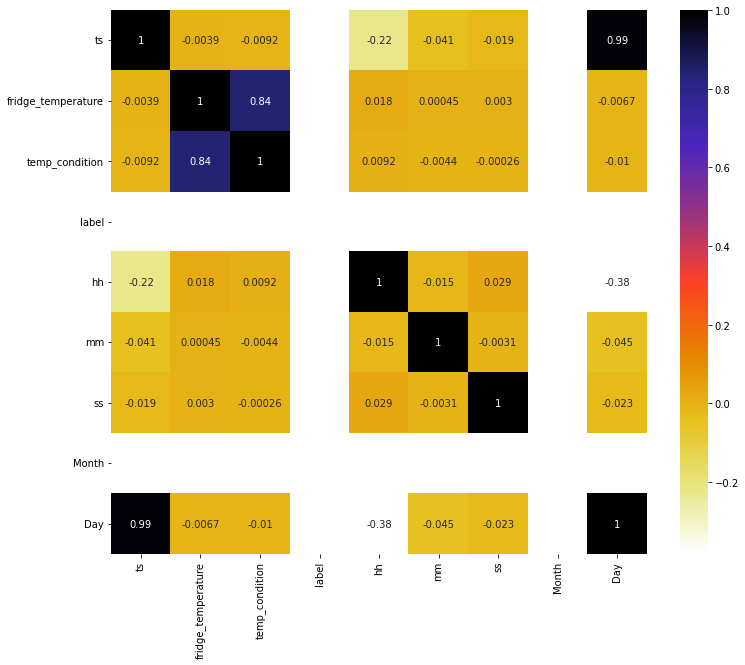

In [25]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [26]:
X_train.drop(['Day','temp_condition','Month'],axis=1,inplace=True)
X_test.drop(['Day','temp_condition','Month'],axis=1,inplace=True)

In [27]:
labels=df_frz.type.value_counts().index
num=All1.type.value_counts().index

In [28]:
#rc = RidgeClassifier(alpha=1.0, copy_X=False, fit_intercept=True, max_iter=None,normalize=False, random_state=2, solver='saga')
rc=RidgeClassifier()

In [29]:
cv=cross_val_score(rc,X_train,y_train,cv=5)
print(cv)
np.mean(cv)


[0.66474568 0.6624906  0.66023553 0.65873215 0.6687547 ]


0.6629917313956402

In [30]:

rc_fit = rc.fit(X_train, y_train)
y_pred_rc = rc_fit.predict(X_test)
rc_accuracy = accuracy_score(y_test, y_pred_rc)
print(classification_report(y_test,y_pred_rc))
print(rc_accuracy)

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       997
           1       0.58      1.00      0.74       974
           2       0.79      1.00      0.88      1015
           3       1.00      0.32      0.48      1015
           4       0.03      0.01      0.01       573
           5       0.00      0.00      0.00       415

    accuracy                           0.66      4989
   macro avg       0.51      0.55      0.48      4989
weighted avg       0.61      0.66      0.58      4989

0.6638604930847866


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.metrics import precision_recall_fscore_support
# Precision Recall and F1 Score
precision_recall_fscore_support(y_test, y_pred_rc,average='weighted')

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.6088442435553325, 0.6638604930847866, 0.5789176763789676, None)

In [32]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [33]:
val=dict(zip(num,labels))

In [34]:
maping=set(y_train)
lebl=[val[i] for i in maping]

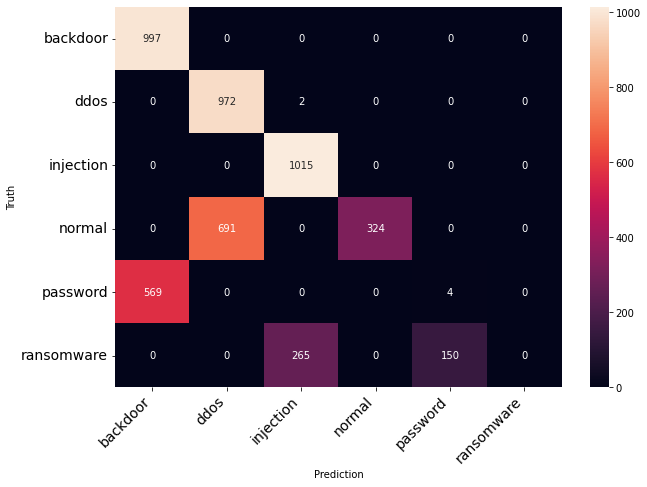

In [35]:
cm=confusion_matrix(y_test, y_pred_rc)
print_confusion_matrix(cm,lebl)

In [36]:
from imblearn.metrics import specificity_score,sensitivity_score
senc=sensitivity_score(y_test, y_pred_rc,average='weighted')
print('sensitivity_score is:')
print(senc)
sepe=specificity_score(y_test, y_pred_rc,average='weighted')
print('specificity_score:')
print(sepe)

sensitivity_score is:
0.6638604930847866
specificity_score:
0.9203457241108878


# GPS Tracking 

In [101]:
df_gps['date']=pd.to_datetime(df_gps['date'])
df_gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58960 entries, 0 to 58959
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ts         58960 non-null  int64         
 1   date       58960 non-null  datetime64[ns]
 2   time       58960 non-null  object        
 3   latitude   58960 non-null  float64       
 4   longitude  58960 non-null  float64       
 5   label      58960 non-null  int64         
 6   type       58960 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 3.1+ MB


In [102]:
Time=df_gps.time.str.split(':')

In [103]:
hh=[int(i[0]) for i in Time]
mm=[int(i[1]) for i in Time]
ss=[int(i[2]) for i in Time]
df_gps['hh']=hh
df_gps['mm']=mm
df_gps['ss']=ss

In [104]:
df_gps['Month']=df_gps.date.dt.month
df_gps['Day']=df_gps.date.dt.day

In [105]:
temp=df_gps['type']
df_gps.drop(['type','time','date'],axis=1,inplace=True)
df_gps['type']=temp

In [106]:
df_gps

,ts,latitude,longitude,label,hh,mm,ss,Month,Day,type
0,1556242299,116.521704,132.162504,1,18,31,39,4,25,ddos
1,1556242301,121.742933,135.072500,1,18,31,41,4,25,ddos
2,1556242306,121.795929,135.110198,1,18,31,46,4,25,ddos
3,1556242309,116.611216,132.224555,1,18,31,49,4,25,ddos
4,1556242311,121.841526,135.151362,1,18,31,51,4,25,ddos
...,...,...,...,...,...,...,...,...,...,...
58955,1554202928,1.028628,10.810522,0,4,2,8,4,2,normal
58956,1554202928,0.345361,10.727989,0,4,2,8,4,2,normal
58957,1554202928,0.423384,10.508036,0,4,2,8,4,2,normal
58958,1554202928,0.445292,10.381356,0,4,2,8,4,2,normal


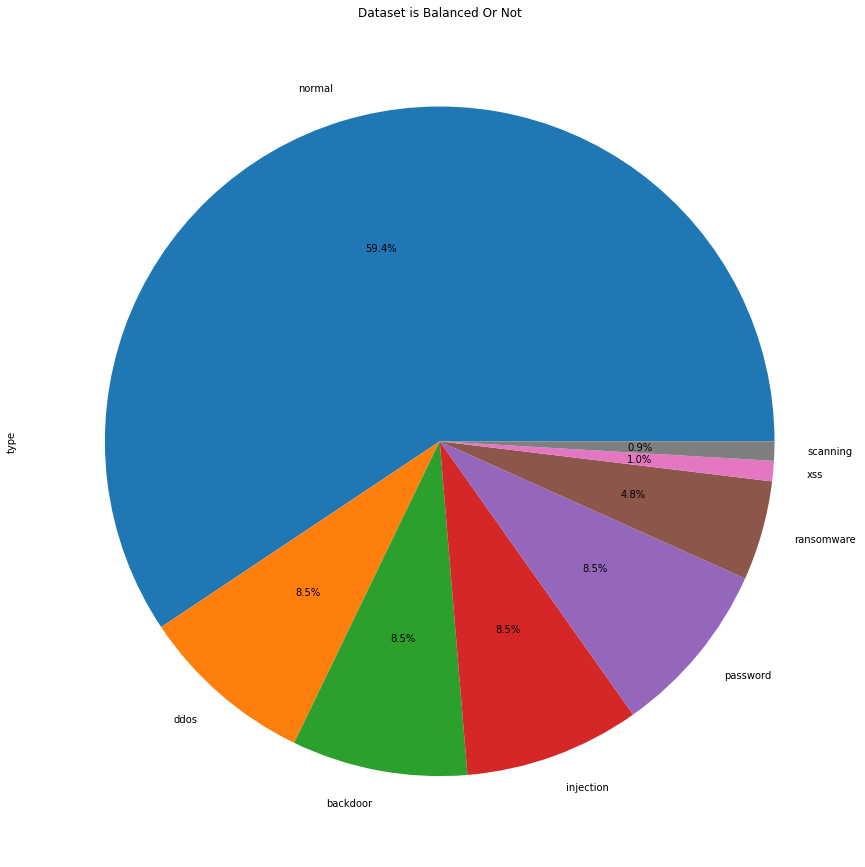

In [107]:
df_gps['type'].value_counts().plot.pie(figsize=(15,16),autopct='%1.1f%%',title='Dataset is Balanced Or Not')

In [108]:
df_gps

,ts,latitude,longitude,label,hh,mm,ss,Month,Day,type
0,1556242299,116.521704,132.162504,1,18,31,39,4,25,ddos
1,1556242301,121.742933,135.072500,1,18,31,41,4,25,ddos
2,1556242306,121.795929,135.110198,1,18,31,46,4,25,ddos
3,1556242309,116.611216,132.224555,1,18,31,49,4,25,ddos
4,1556242311,121.841526,135.151362,1,18,31,51,4,25,ddos
...,...,...,...,...,...,...,...,...,...,...
58955,1554202928,1.028628,10.810522,0,4,2,8,4,2,normal
58956,1554202928,0.345361,10.727989,0,4,2,8,4,2,normal
58957,1554202928,0.423384,10.508036,0,4,2,8,4,2,normal
58958,1554202928,0.445292,10.381356,0,4,2,8,4,2,normal


In [110]:
All=df_gps
labels=list(All.type.value_counts().index)
labels

['normal',
 'ddos',
 'backdoor',
 'injection',
 'password',
 'ransomware',
 'xss',
 'scanning']

In [80]:
All['type']=LabelEncoder().fit_transform(All['type'])

In [111]:
num=list(df_gps.type.value_counts().index)


In [112]:
All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58960 entries, 0 to 58959
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         58960 non-null  int64  
 1   latitude   58960 non-null  float64
 2   longitude  58960 non-null  float64
 3   label      58960 non-null  int64  
 4   hh         58960 non-null  int64  
 5   mm         58960 non-null  int64  
 6   ss         58960 non-null  int64  
 7   Month      58960 non-null  int64  
 8   Day        58960 non-null  int64  
 9   type       58960 non-null  object 
dtypes: float64(2), int64(7), object(1)
memory usage: 4.5+ MB


In [113]:
#All=All.drop(['date','time'],axis=1)

In [114]:
X=All.iloc[:,:-1]
y=All.iloc[:,-1]

In [115]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [116]:
X_train.corr()

,ts,latitude,longitude,label,hh,mm,ss,Month,Day
ts,1.000000,0.357235,0.360201,0.997084,-0.095320,-0.132958,-0.001557,0.693882,0.196697
latitude,0.357235,1.000000,0.999590,0.353491,0.363807,-0.089415,0.002108,0.487613,-0.262585
longitude,0.360201,0.999590,1.000000,0.356306,0.361616,-0.088899,0.001800,0.486920,-0.258225
label,0.997084,0.353491,0.356306,1.000000,-0.072389,-0.106080,-0.000035,0.665524,0.231564
hh,-0.095320,0.363807,0.361616,-0.072389,1.000000,0.258486,0.021787,-0.031698,-0.082309
mm,-0.132958,-0.089415,-0.088899,-0.106080,0.258486,1.000000,0.005740,-0.494070,0.515657
ss,-0.001557,0.002108,0.001800,-0.000035,0.021787,0.005740,1.000000,-0.007171,0.007602
Month,0.693882,0.487613,0.486920,0.665524,-0.031698,-0.494070,-0.007171,1.000000,-0.569433
Day,0.196697,-0.262585,-0.258225,0.231564,-0.082309,0.515657,0.007602,-0.569433,1.000000


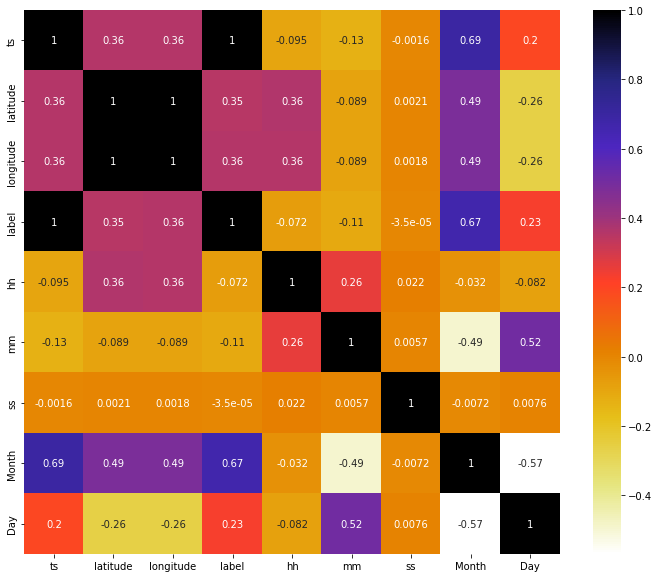

In [117]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [118]:
X_train.drop(['label','latitude'],axis=1,inplace=True)
X_test.drop(['label','latitude'],axis=1,inplace=True)

In [119]:
#rc = RidgeClassifier(alpha=1.0, copy_X=False, fit_intercept=True, max_iter=None,normalize=False, random_state=2, solver='saga')
rc=RidgeClassifier()

In [120]:
cv=cross_val_score(rc,X_train,y_train,cv=5)
print(cv)
np.mean(cv)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.14255e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.14186e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.14299e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.14207e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[0.80835277 0.81132075 0.81047276 0.81045267 0.80875649]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.14229e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


0.809871087749827

In [121]:

rc_fit = rc.fit(X_train, y_train)
y_pred_rc = rc_fit.predict(X_test)
rc_accuracy = accuracy_score(y_test, y_pred_rc)
print(classification_report(y_test,y_pred_rc))
print(rc_accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.71388e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    backdoor       0.45      0.62      0.52       975
        ddos       0.65      0.48      0.55      1022
   injection       0.43      0.54      0.48       991
      normal       1.00      1.00      1.00      7050
    password       0.65      0.94      0.77       978
  ransomware       0.00      0.00      0.00       566
    scanning       0.00      0.00      0.00       103
         xss       0.00      0.00      0.00       107

    accuracy                           0.81     11792
   macro avg       0.40      0.45      0.42     11792
weighted avg       0.78      0.81      0.79     11792

0.8139416553595658


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
# Precision Recall and F1 Score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred_rc,average='weighted')

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.781558598231155, 0.8139416553595658, 0.7930229960709707, None)

In [123]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [124]:
val=dict(zip(num,labels))

In [125]:
maping=set(y_train)
lebl=[val[i] for i in maping]

In [126]:
lebl

['backdoor',
 'normal',
 'ddos',
 'ransomware',
 'password',
 'injection',
 'xss',
 'scanning']

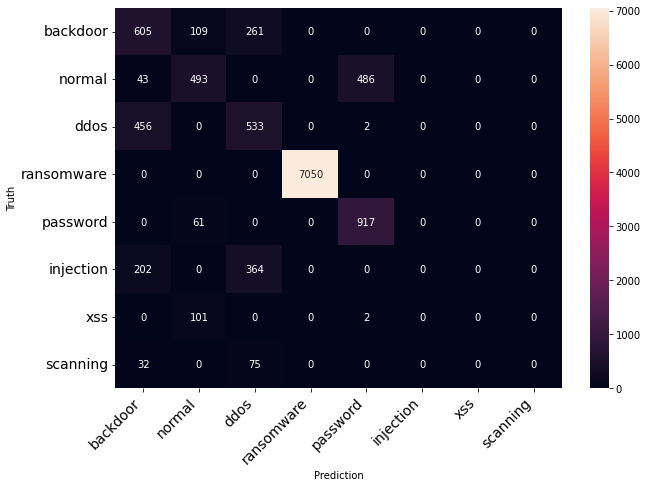

In [127]:
cm=confusion_matrix(y_test, y_pred_rc)
print_confusion_matrix(cm,lebl)

In [128]:
from imblearn.metrics import specificity_score,sensitivity_score
senc=sensitivity_score(y_test, y_pred_rc,average='weighted')
print('sensitivity_score is:')
print(senc)
sepe=specificity_score(y_test, y_pred_rc,average='weighted')
print('specificity_score:')
print(sepe)

sensitivity_score is:
0.8139416553595658
specificity_score:
0.9830117039010714


# Garage Dore

In [129]:
df_GD

,ts,date,time,door_state,sphone_signal,label,type
0,1556228553,25-Apr-19,14:42:33,closed,0,1,ddos
1,1556228558,25-Apr-19,14:42:38,closed,0,1,ddos
2,1556228563,25-Apr-19,14:42:43,closed,0,1,ddos
3,1556228568,25-Apr-19,14:42:48,closed,0,1,ddos
4,1556228578,25-Apr-19,14:42:58,closed,0,1,ddos
...,...,...,...,...,...,...,...
59582,1554203357,2-Apr-19,04:09:17,closed,false,0,normal
59583,1554203357,2-Apr-19,04:09:17,open,true,0,normal
59584,1554203357,2-Apr-19,04:09:17,closed,false,0,normal
59585,1554203357,2-Apr-19,04:09:17,closed,false,0,normal


In [130]:
df_GD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59587 entries, 0 to 59586
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ts             59587 non-null  int64 
 1   date           59587 non-null  object
 2   time           59587 non-null  object
 3   door_state     59587 non-null  object
 4   sphone_signal  59587 non-null  object
 5   label          59587 non-null  int64 
 6   type           59587 non-null  object
dtypes: int64(2), object(5)
memory usage: 3.2+ MB


In [131]:
df_GD.sphone_signal.replace(['false  ','0'],0,inplace=True)
df_GD.sphone_signal.replace(['true  ','1'],1,inplace=True)
df_GD.sphone_signal.value_counts()

0    53588
1     5999
Name: sphone_signal, dtype: int64

In [132]:
df_GD.door_state.replace('closed',0,inplace=True)
df_GD.door_state.replace('open',1,inplace=True)
df_GD.door_state.value_counts()

0    53588
1     5999
Name: door_state, dtype: int64

In [133]:
df_GD['date']=pd.to_datetime(df_GD['date'])
df_GD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59587 entries, 0 to 59586
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ts             59587 non-null  int64         
 1   date           59587 non-null  datetime64[ns]
 2   time           59587 non-null  object        
 3   door_state     59587 non-null  int64         
 4   sphone_signal  59587 non-null  int64         
 5   label          59587 non-null  int64         
 6   type           59587 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 3.2+ MB


In [134]:
Time=df_GD.time.str.split(':')

In [135]:
hh=[int(i[0]) for i in Time]
mm=[int(i[1]) for i in Time]
ss=[int(i[2]) for i in Time]
df_GD['hh']=hh
df_GD['mm']=mm
df_GD['ss']=ss

In [136]:
df_GD['Month']=df_GD.date.dt.month
df_GD['Day']=df_GD.date.dt.day

In [137]:
temp=df_GD['type']
df_GD.drop(['type','time','date'],axis=1,inplace=True)
df_GD['type']=temp

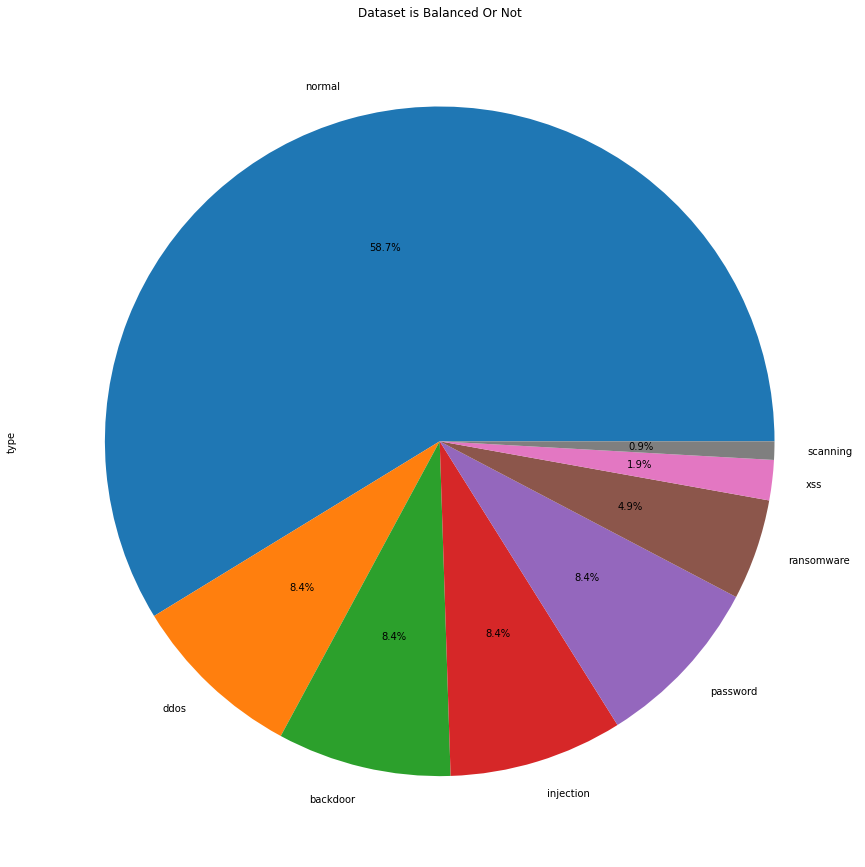

In [138]:
df_GD['type'].value_counts().plot.pie(figsize=(15,16),autopct='%1.1f%%',title='Dataset is Balanced Or Not')

In [139]:
All3=df_GD
labels=list(All3.type.value_counts().index)
All3['type']=LabelEncoder().fit_transform(All3['type'])
num=list(All3.type.value_counts().index)


In [140]:
All3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59587 entries, 0 to 59586
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ts             59587 non-null  int64
 1   door_state     59587 non-null  int64
 2   sphone_signal  59587 non-null  int64
 3   label          59587 non-null  int64
 4   hh             59587 non-null  int64
 5   mm             59587 non-null  int64
 6   ss             59587 non-null  int64
 7   Month          59587 non-null  int64
 8   Day            59587 non-null  int64
 9   type           59587 non-null  int64
dtypes: int64(10)
memory usage: 4.5 MB


In [141]:
X=All3.iloc[:,:-1]
y=All3.iloc[:,-1]

In [142]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [143]:
X_train.corr()

,ts,door_state,sphone_signal,label,hh,mm,ss,Month,Day
ts,1.000000,-0.003524,-0.003524,0.996484,0.328081,-0.081285,0.023966,0.700400,0.189576
door_state,-0.003524,1.000000,1.000000,-0.003643,-0.002177,-0.001751,0.002621,-0.004173,0.001724
sphone_signal,-0.003524,1.000000,1.000000,-0.003643,-0.002177,-0.001751,0.002621,-0.004173,0.001724
label,0.996484,-0.003643,-0.003643,1.000000,0.344866,-0.047127,0.029494,0.669032,0.228703
hh,0.328081,-0.002177,-0.002177,0.344866,1.000000,0.376037,0.069354,-0.123469,0.535521
mm,-0.081285,-0.001751,-0.001751,-0.047127,0.376037,1.000000,0.045445,-0.574022,0.694473
ss,0.023966,0.002621,0.002621,0.029494,0.069354,0.045445,1.000000,-0.042295,0.085406
Month,0.700400,-0.004173,-0.004173,0.669032,-0.123469,-0.574022,-0.042295,1.000000,-0.567939
Day,0.189576,0.001724,0.001724,0.228703,0.535521,0.694473,0.085406,-0.567939,1.000000


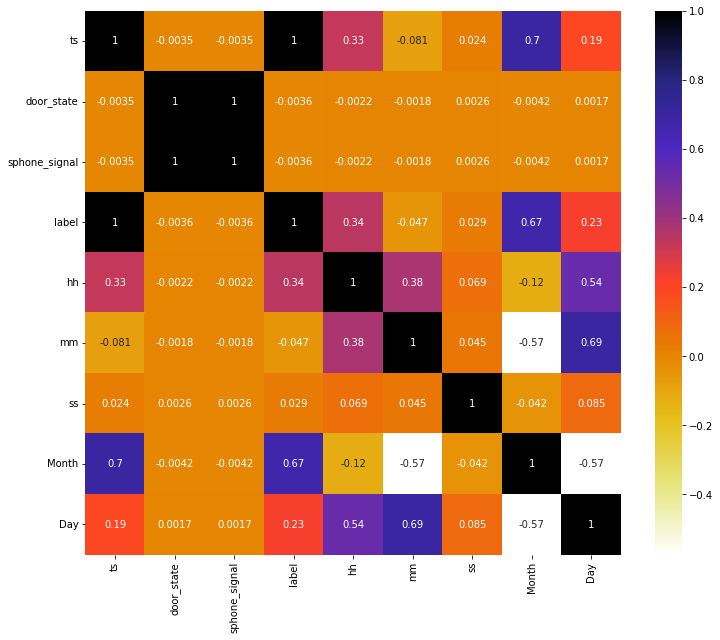

In [144]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [145]:
All3.drop(['sphone_signal','label'],inplace=True,axis=1)

In [146]:
#rc = RidgeClassifier(alpha=1.0, copy_X=False, fit_intercept=True, max_iter=None,normalize=False, random_state=2, solver='saga')
rc=RidgeClassifier()

In [147]:
cv=cross_val_score(rc,X_train,y_train,cv=5)
print(cv)
np.mean(cv)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.10455e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.10514e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.10461e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.10482e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[0.88325991 0.88388924 0.885043   0.8833648  0.88324767]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.10433e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


0.8837609240122928

In [148]:

rc_fit = rc.fit(X_train, y_train)
y_pred_rc = rc_fit.predict(X_test)
rc_accuracy = accuracy_score(y_test, y_pred_rc)
print(classification_report(y_test,y_pred_rc))
print(rc_accuracy)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       971
           1       0.59      0.95      0.73      1015
           2       0.79      1.00      0.89      1016
           3       1.00      1.00      1.00      7017
           4       0.00      0.00      0.00      1002
           5       0.72      1.00      0.84       575
           6       0.00      0.00      0.00       102
           7       0.00      0.00      0.00       220

    accuracy                           0.88     11918
   macro avg       0.49      0.62      0.54     11918
weighted avg       0.81      0.88      0.84     11918

0.8842926665547911


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.68375e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being s

In [149]:
# Precision Recall and F1 Score
precision_recall_fscore_support(y_test, y_pred_rc,average='weighted')

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8072844859253656, 0.8842926665547911, 0.8394044281715438, None)

In [150]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [151]:
val=dict(zip(num,labels))

In [152]:
maping=set(y_train)
lebl=[val[i] for i in maping]

In [153]:
lebl

['backdoor',
 'ddos',
 'injection',
 'normal',
 'password',
 'ransomware',
 'scanning',
 'xss']

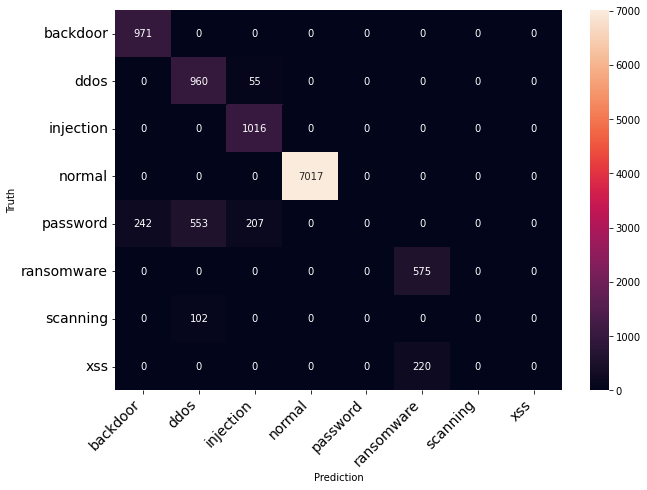

In [154]:
cm=confusion_matrix(y_test, y_pred_rc)
print_confusion_matrix(cm,lebl)

In [155]:
from imblearn.metrics import specificity_score,sensitivity_score
senc=sensitivity_score(y_test, y_pred_rc,average='weighted')
print('sensitivity_score is:')
print(senc)
sepe=specificity_score(y_test, y_pred_rc,average='weighted')
print('specificity_score:')
print(sepe)

sensitivity_score is:
0.8842926665547911
specificity_score:
0.9900981022107881
